# Importar librerias

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io
import os
import glob
import pandas as pd
from custom_defs import explore,view_shapes
import tqdm

In [2]:
path_train = 'C:/Users/migue/OneDrive/Escritorio/Tercer_Semestre/DATASETS/Springfield/simpsons_dataset/'
path_test = 'C:/Users/migue/OneDrive/Escritorio/Tercer_Semestre/DATASETS/Springfield/simpsons_testdataset/'
class_and_paths_train = explore(path_train)
class_and_paths_test = explore(path_test)

In [3]:
Total_train = 0
Total_test=0
row_table = []
for (k,v),(k2,v2) in zip(class_and_paths_train.items(),class_and_paths_test.items()):
    if k!=k2:
        print("Bad Order or Folder Name!")
        break
    else:
        count_train = len(glob.glob(str(v)+'/*.*'))
        count_test=len(glob.glob(str(v2)+'/*.*'))
        row_table.append({'Nombre': k,
                      'Train Image': count_train,
                      'Test Image':count_test,
                      'Total PC':count_train+count_test})
        Total_train+=count_train
        Total_test+=count_test   
df = pd.DataFrame(row_table)[['Nombre',
                              'Train Image',
                              'Test Image','Total PC']].sort_values('Total PC',
                                                            ascending=False).reset_index(drop=True)
         

In [4]:
df.loc["Total"] = df.sum(numeric_only=True, axis=0)
df.fillna('')

,Nombre,Train Image,Test Image,Total PC
0,homer_simpson,4128.0,306.0,4434.0
1,bart_simpson,2562.0,261.0,2823.0
2,lisa_simpson,2383.0,222.0,2605.0
3,marge_simpson,1810.0,307.0,2117.0
4,maggie_simpson,1371.0,162.0,1533.0
5,ned_flanders,1454.0,49.0,1503.0
6,moe_szyslak,1452.0,50.0,1502.0
7,krusty_the_clown,1206.0,50.0,1256.0
8,principal_skinner,1195.0,50.0,1245.0
9,charles_montgomery_burns,1193.0,48.0,1241.0


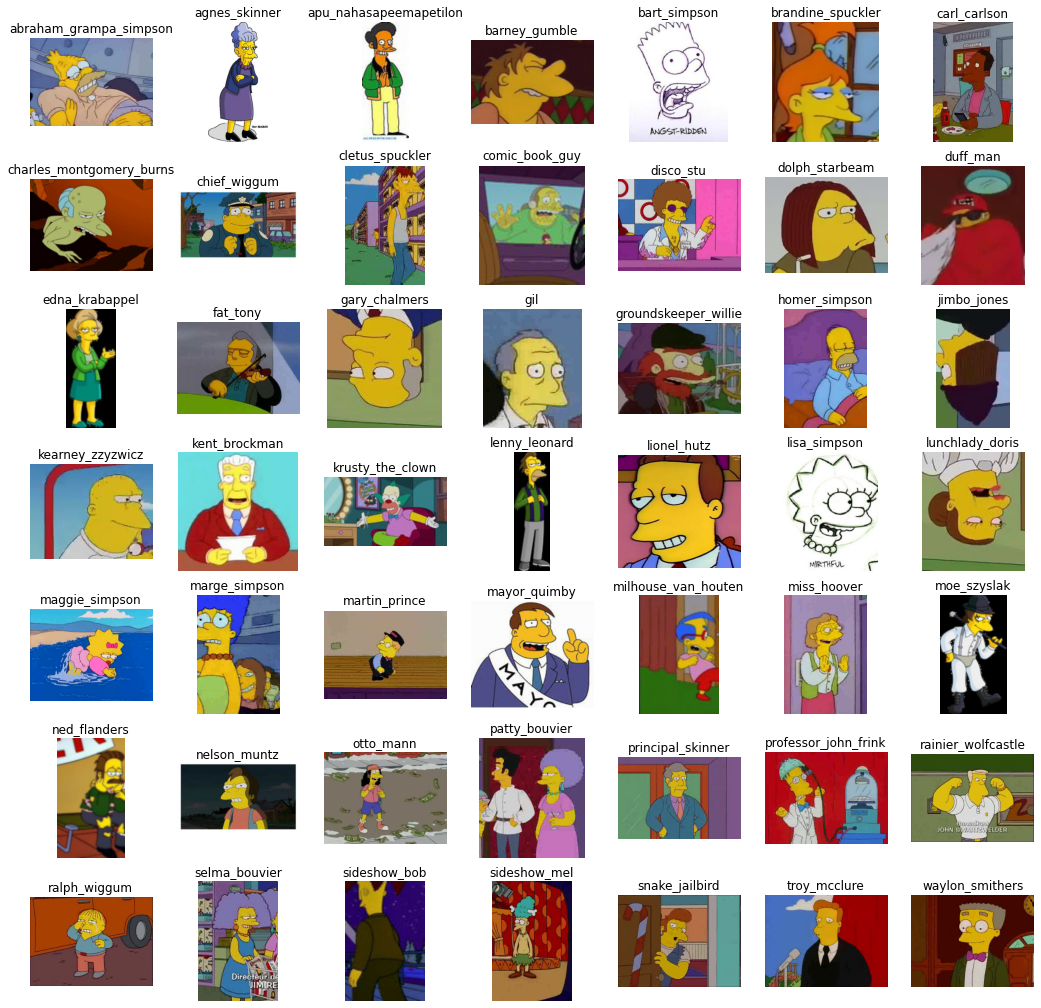

In [5]:
i = 1
plt.figure(figsize=(18, 18))
for key, value in class_and_paths_train.items():
    files = glob.glob(value+'/*.jpg')
    img = io.imread(files[0])
    plt.subplot(7, 7, i)
    plt.imshow(img)
    plt.axis('off')
    plt.title(key)

    i += 1


In [6]:
img_shapes=[]
lista_archivos=[]
for key, value in tqdm.tqdm(class_and_paths_train.items()):
    files = glob.glob(value+'/*.*')
    lista_archivos.append(files)
    for i in files:
        img_shapes.append([view_shapes(i)])
for key, value in tqdm.tqdm(class_and_paths_test.items()):
    files = glob.glob(value+'/*.*')
    lista_archivos.append(files)
    for i in files:
        img_shapes.append([view_shapes(i)])
print(len(img_shapes))

100%|██████████| 49/49 [00:49<00:00,  1.01s/it]

34575


In [7]:
paths=[j for i in lista_archivos for j in i]
files_extensions=list(map(os.path.splitext,paths))
files_extensions=[j for _,j in files_extensions]

types_files,counts=np.unique(files_extensions,return_counts=True)
for i,j in zip(types_files,counts):
    print("El dataset contiene {} archivos {}".format(j,i))


El dataset contiene 3 archivos .JPG
El dataset contiene 14 archivos .bmp
El dataset contiene 48 archivos .gif
El dataset contiene 3 archivos .jpeg
El dataset contiene 34455 archivos .jpg
El dataset contiene 52 archivos .png


In [8]:
size_each_image=np.asarray(img_shapes).reshape(len(img_shapes),2)
sum_dim=np.sum(size_each_image,axis=1)
print("Se cuentan con imagenes de dimensiones de hasta {}".format(size_each_image[np.argmax(sum_dim)]))

Se cuentan con imagenes de dimensiones de hasta [1920 1080]
